In [1]:
pwd

'/tmp/notebooks'

In [2]:
import os
import sys
sys.path[0] = os.path.join(os.path.abspath(''),'..')  # make sure we can import from our package

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_pipeline.spatial_operations as so
import data_pipeline.fetch_fcc_data as fetch_fcc
import data_pipeline.fetch_census_data as fetch_census
from IPython.display import display  # required to display full dataframe tables
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [4]:
import geopandas
import contextily as cx

In [5]:
cities_df = geopandas.read_file("/tmp/internet-access-map/data/broadband.geojson")

In [6]:
cities_df

geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  \
0      34005702808  2.143   2.143    1.000    1.000         0.000   
1      39153504200  3.286   2.457    1.000    1.000         0.000   
2      36071000502  2.857   2.776    1.939    1.939         0.939   
3      06013370000  3.840   3.693    2.680    1.613         0.747   
4      48113019204  2.714   2.590    1.638    1.619         0.619   
...            ...    ...     ...      ...      ...           ...   
72826  39113040406  2.683   2.260    1.163    1.000         0.000   
72827  48245011303  2.109   1.703    0.125    0.016         0.000   
72828  01073012302  2.313   2.134    1.070    1.010         0.184   
72829  06081608023  4.633   4.500    1.833    1.333         0.400   
72830  53061052112  5.162   4.135    1.919    1.703         0.135   

       fiber_100u_exists    max_dn   max_up  f_broadband  ...  population  \
0                  0.000  1000.000   35.000        0.910  ...      3353.0   
1                  0.000   940.000   35.000        0.634  ...      1708.0   
2                  0.939   940.000  828.265        0.508  ...      3763.0   
3                  0.747   875.333  784.667        0.925  ...      2850.0   
4                  0.619   977.143  632.381        0.890  ...     10051.0   
...                  ...       ...      ...          ...  ...         ...   
72826              0.000   940.000   35.000        0.963  ...      6926.0   
72827              0.000    51.062    9.609        0.770  ...      3111.0   
72828              0.184   805.323  207.600        0.850  ...      4026.0   
72829              0.400   908.000  448.000        0.954  ...      2598.0   
72830              0.135   766.270  150.324        0.934  ...      2540.0   

       households    tests  devices  d_mbps  u_mbps  lat_ms  tests_per_cap  \
0          1055.0    31.62    20.18  305.57   20.75   14.66          0.009   
1           694.0    48.11    19.26  162.57   12.29   27.06          0.028   
2          1204.0    33.07    23.37  267.28   76.41   12.45          0.009   
3          1137.0   289.57    60.46  261.09  127.88   12.62          0.102   
4          2718.0   320.81   127.74  246.56  108.10   17.63          0.032   
...           ...      ...      ...     ...     ...     ...            ...   
72826      2711.0  1239.43   270.96  222.81   18.72   30.94          0.179   
72827      1149.0   211.03    55.35  105.60  146.35   66.37          0.068   
72828      1418.0   232.29    71.62  242.09   23.34   25.17          0.058   
72829       864.0   253.75    73.06  301.00   76.61   12.91          0.098   
72830       908.0   178.42    69.85  180.04   18.74   18.82          0.070   

       devices_per_cap                                           geometry  
0                0.006  POLYGON ((-74.90801 40.03250, -74.90496 40.036...  
1                0.011  POLYGON ((-81.51807 41.05957, -81.51805 41.062...  
2                0.006  POLYGON ((-74.02226 41.49281, -74.02180 41.496...  
3                0.021  POLYGON ((-122.32697 37.93502, -122.32611 37.9...  
4                0.013  POLYGON ((-96.76903 32.94655, -96.76899 32.950...  
...                ...                                                ...  
72826            0.039  POLYGON ((-84.21066 39.58867, -84.20976 39.597...  
72827            0.018  POLYGON ((-94.28353 29.88008, -94.26230 29.910...  
72828            0.018  POLYGON ((-87.16295 33.49311, -87.16185 33.495...  
72829            0.028  POLYGON ((-122.27898 37.54565, -122.27590 37.5...  
72830            0.027  POLYGON ((-122.11190 47.80492, -122.11100 47.8...  

[72831 rows x 26 columns]

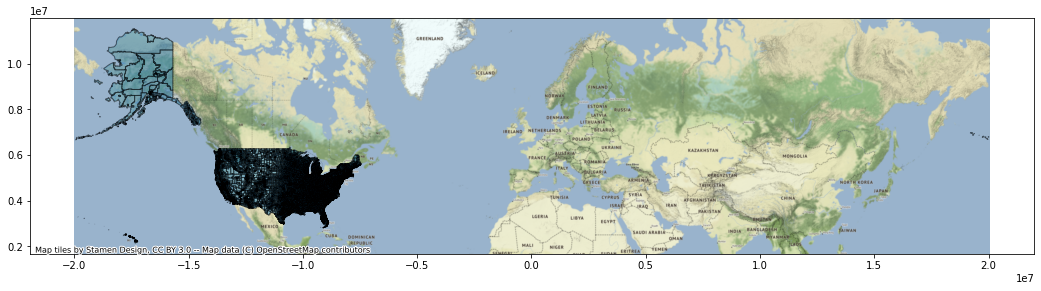

In [7]:
cities_df = cities_df.to_crs(epsg=3857)

ax = cities_df.plot(figsize=(18, 18), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

In [8]:
broadband = pd.read_csv("/tmp/internet-access-map/data/broadband.csv.gz")

In [9]:
broadband.head()

geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  \
0  34005702808  2.143   2.143    1.000    1.000         0.000   
1  39153504200  3.286   2.457    1.000    1.000         0.000   
2  36071000502  2.857   2.776    1.939    1.939         0.939   
3   6013370000  3.840   3.693    2.680    1.613         0.747   
4  48113019204  2.714   2.590    1.638    1.619         0.619   

   fiber_100u_exists    max_dn   max_up  f_broadband  ...  log_mhi  \
0              0.000  1000.000   35.000        0.910  ...    11.20   
1              0.000   940.000   35.000        0.634  ...    10.04   
2              0.939   940.000  828.265        0.508  ...    10.77   
3              0.747   875.333  784.667        0.925  ...    11.54   
4              0.619   977.143  632.381        0.890  ...    11.19   

   population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0      3353.0      1055.0   31.62    20.18  305.57   20.75   14.66   
1      1708.0       694.0   48.11    19.26  162.57   12.29   27.06   
2      3763.0      1204.0   33.07    23.37  267.28   76.41   12.45   
3      2850.0      1137.0  289.57    60.46  261.09  127.88   12.62   
4     10051.0      2718.0  320.81   127.74  246.56  108.10   17.63   

   tests_per_cap  devices_per_cap  
0          0.009            0.006  
1          0.028            0.011  
2          0.009            0.006  
3          0.102            0.021  
4          0.032            0.013  

[5 rows x 25 columns]

In [10]:
sf = geopandas.read_file("/tmp/neighborhood-data/san-fransisco/SF Find Neighborhoods/geo_export_f62da660-837f-478c-9ba4-ceb40e9ed8eb.shp")

sf = sf.to_crs(epsg=3857)


In [11]:
sf

link  \
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...   
1                                                 None   
2                    http://www.nps.gov/prsf/index.htm   
3                                                 None   
4    http://www.sfgate.com/neighborhoods/sf/innerri...   
..                                                 ...   
112  http://en.wikipedia.org/wiki/Corona_Heights,_S...   
113        http://en.wikipedia.org/wiki/Haight-Ashbury   
114  http://en.wikipedia.org/wiki/Eureka_Valley,_Sa...   
115  http://en.wikipedia.org/wiki/St._Francis_Wood,...   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...   

                       name                                           geometry  
0                  Seacliff  POLYGON ((-13635909.066 4548889.167, -13635939...  
1               Lake Street  POLYGON ((-13635207.246 4548926.811, -13635222...  
2    Presidio National Park  POLYGON ((-13634141.858 4552759.779, -13634091...  
3          Presidio Terrace  POLYGON ((-13633566.376 4549428.413, -13633409...  
4            Inner Richmond  POLYGON ((-13633590.339 4549283.086, -13632945...  
..                      ...                                                ...  
112          Corona Heights  POLYGON ((-13629422.779 4545953.181, -13629437...  
113         Ashbury Heights  POLYGON ((-13631289.585 4545785.263, -13631305...  
114           Eureka Valley  POLYGON ((-13629662.606 4545908.690, -13629628...  
115        St. Francis Wood  POLYGON ((-13633472.736 4542016.274, -13633109...  
116         Sherwood Forest  POLYGON ((-13632062.910 4542836.706, -13632047...  

[117 rows x 3 columns]

In [12]:
colmb = geopandas.read_file("/tmp/neighborhood-data/columbus/Columbus_Communities/Columbus_Communities.shp")

colmb = colmb.to_crs(epsg=3857)

In [13]:
colmb

OBJECTID               AREA_NAME  CREATED_DA  LAST_EDIT_  AREA_NO  \
0        359               Far South  2018-10-02  2021-08-18       64   
1        360  Livingston Avenue Area  2018-10-02  2018-10-02       62   
2        361               Southwest  2018-10-02  2018-10-02       59   
3        362     University District  2018-10-02  2018-10-02       44   
4        363                Westland  2018-10-02  2018-10-02       52   
5        364            South Linden  2018-10-02  2018-10-02       45   
6        365              South Side  2018-10-02  2018-10-02       63   
7        366             Milo-Grogan  2018-10-02  2018-10-02       48   
8        367                Far East  2018-10-02  2018-10-02       58   
9        368             West Scioto  2018-10-02  2018-10-02       37   
10       369      Fifth by Northwest  2018-10-02  2018-10-02       42   
11       370         Greater Hilltop  2018-10-02  2018-10-02       53   
12       371               Near East  2018-10-02  2018-10-02       56   
13       372           North Central  2018-10-02  2018-10-02       49   
14       373            North Linden  2018-10-02  2018-10-02       40   
15       374             Franklinton  2018-10-02  2018-10-02       54   
16       375               Northeast  2018-10-02  2018-10-02       41   
17       376            Clintonville  2018-10-02  2018-10-02       39   
18       377              South East  2018-10-02  2018-10-02       65   
19       378               Northland  2018-10-02  2018-10-02       35   
20       379                Downtown  2018-10-02  2018-10-02       55   
21       380         Italian Village  2018-10-02  2018-10-02       47   
22       381        Brewery District  2018-10-02  2018-10-02       60   
23       382          German Village  2018-10-02  2018-10-02       61   
24       383       Victorian Village  2018-10-02  2018-10-02       46   
25       384           Far Northwest  2018-10-02  2018-10-02       31   
26       385               Northwest  2018-10-02  2018-10-02       34   
27       386               Far North  2018-10-02  2018-10-02       32   
28       387           East Columbus  2018-10-02  2018-10-02       50   
29       388                Mid East  2018-10-02  2018-10-02       57   
30       389              Hayden Run  2018-10-02  2018-10-02       30   
31       390                Far West  2018-10-02  2021-08-18       36   
32       391                 Airport  2018-10-02  2018-10-02       51   
33       392    Rocky Fork-Blacklick  2018-10-02  2021-08-18       33   
34       393          Olentangy West  2018-10-02  2018-10-02       38   
35       394           Harrison West  2018-10-02  2018-10-02       43   
36       395    Harmon Road Corridor  2018-10-02  2018-10-03       69   
37       396              Wolfe Park  2018-10-02  2018-10-03       67   
38       397    Dublin Road Corridor  2018-10-02  2018-10-03       68   
39       398              Fort Hayes  2018-10-02  2018-10-03       70   
40       399           State of Ohio  2018-10-02  2018-10-03       66   

                                  GLOBALID    SHAPESTAre     SHAPESTLen  \
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
1   {68BD6D27-A7AA-49EF-B7C0-6A2464E3438E}  3.046661e+07   32366.704615   
2   {417925A7-E194-47C5-95EE-866972B32697}  2.984521e+08   79601.134297   
3   {EB56F546-7152-4174-9982-16FEBB30AC7C}  8.092196e+07   39496.606022   
4   {FEC6B62A-1C9D-4A05-8831-A34CBEBB5A88}  4.623001e+08  105732.693794   
5   {939F5DBB-93A2-490D-8F4D-7D45DBCCF4F3}  4.448003e+07   32206.753417   
6   {644B4BC2-2794-489B-ABED-0BCFECB75C45}  1.968865e+08   70506.899018   
7   {6625CBE2-349C-4E60-989C-85A15F4EF422}  2.577864e+07   22760.711867   
8   {E8F939C3-FAAA-488A-A9D1-A34B9B6E32D1}  4.179552e+08  164113.919967   
9   {F53FFF7E-49DE-4455-85A3-8FF84EF31A1F}  3.143576e+08  106726.183080   
10  {483FB68D-B2FA-4D58-982B-0BEAFE12A5AC}  3.060905e+07   37877.930959   
11  {B2EB0D99-1757-412E-8223-3BDA6EC7

In [14]:
indy = geopandas.read_file("/tmp/neighborhood-data/indianapolis/Indy_Neighborhoods/Indy_Neighborhoods.shp")

indy = indy.to_crs(epsg=3857)

In [15]:
indy

OBJECTID                   NAME                                GLOBALID  \
0          1                Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}   
1          2           Allisonville  {3C2FC136-DE1E-4781-BB3A-B8A216380010}   
2          3              Ameriplex  {DAD6AF6D-D435-425B-88B6-9366BEA1BD46}   
3          4        Arlington Woods  {402F6582-B1B7-4D89-AD56-8AE65B88813D}   
4          5  Augusta / New Augusta  {1DF38A7D-123A-456F-958D-AC88A39B1C3B}   
..       ...                    ...                                     ...   
94        95            East Warren  {B8362AA1-0392-44B8-B3DA-7099FBCB7772}   
95        96             Crown Hill  {48952719-6586-4B07-9223-EA615C21FE4D}   
96        97               Glendale  {CBE05884-9728-4671-AABE-EAF0BC982475}   
97        98         Christian Park  {9F9F0154-9C80-4A62-8599-9A4D387F4ACA}   
98        99           College Park  {5D2E2E93-C151-4BBA-9928-E9974C069694}   

       SHAPEAREA      SHAPELEN  \
0   2.418690e+08  67933.203292   
1   1.255110e+08  51059.236455   
2   1.691959e+08  65095.975896   
3   1.285996e+08  50295.544752   
4   1.606854e+08  58918.859142   
..           ...           ...   
94  2.126749e+08  66719.811623   
95  3.746880e+07  30093.051024   
96  5.068965e+07  28712.824081   
97  7.420210e+07  36807.627024   
98  4.899743e+07  38077.523811   

                                             geometry  
0   POLYGON ((-9602944.613 4829335.979, -9602943.7...  
1   POLYGON ((-9582940.862 4852151.547, -9582908.4...  
2   POLYGON ((-9603441.542 4821693.570, -9603468.2...  
3   POLYGON ((-9577032.371 4840641.248, -9577024.6...  
4   POLYGON ((-9596078.222 4853157.578, -9596078.3...  
..                                                ...  
94  MULTIPOLYGON (((-9568194.547 4834410.850, -956...  
95  POLYGON ((-9590926.890 4838926.845, -9590923.2...  
96  POLYGON ((-9586679.422 4848990.201, -9586541.3...  
97  POLYGON ((-9582713.545 4831174.608, -9582713.5...  
98  POLYGON ((-9596130.045 4855293.322, -9596116.1...  

[99 rows x 6 columns]

In [16]:
charlotte = geopandas.read_file("/tmp/neighborhood-data/charlotte/Historic_Districts/Historic_Districts.shp")

charlotte = charlotte.to_crs(epsg=3857)

In [17]:
charlotte

OBJECTID DistrictTy        DistrictNa              Name created_us  \
0         8      Local          4th Ward          4th Ward       None   
1         9      Local           Wilmore           Wilmore       None   
2        10      Local          Dilworth          Dilworth       None   
3        11      Local      Oaklawn Park      Oaklawn Park      98315   
4        12      Local   Hermitage Court   Hermitage Court       None   
5        13      Local     Plaza-Midwood     Plaza-Midwood       None   
6        14      Local    Wesley Heights    Wesley Heights       None   
7        15      Local  McCrorey Heights  McCrorey Heights      94977   

   created_da last_edite  last_edi_1                              GlobalID  \
0        None       None        None  363f7f44-a5fc-43aa-9301-e7f4221089aa   
1        None       None        None  2f7db0a6-9ffc-4c58-a114-94f04282c67e   
2        None       None        None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4   
3  2021-01-22      98315  2021-01-22  3d201a4e-6ebe-4257-a5bb-cf0a6554abfc   
4        None       None        None  100b1bb1-f1e7-41d1-8e86-3b9ab3e33b3e   
5        None       None        None  bd52fa84-42d9-4a51-a6db-a3d998cc164c   
6        None       None        None  8d70ca0c-b3a3-41a7-9699-088fd7aa4f68   
7  2022-08-19      94977  2022-08-19  7a897aa6-00e6-48e4-a7ca-52533a88481b   

     Shape__Are    Shape__Len  \
0  4.645947e+06  10343.413357   
1  7.172640e+06  14700.959903   
2  1.910140e+07  23795.732977   
3  2.700274e+06  12045.481581   
4  6.538097e+05   3595.207778   
5  4.200914e+06  13083.233327   
6  4.338801e+06  10527.036173   
7  3.010454e+06   8709.819062   

                                            geometry  
0  POLYGON ((-8999443.705 4196011.326, -8999437.3...  
1  POLYGON ((-9001402.113 4193776.711, -9001364.8...  
2  POLYGON ((-9001144.698 4192315.173, -9001037.5...  
3  POLYGON ((-8999457.411 4198624.696, -8999471.9...  
4  POLYGON ((-8997826.061 4191782.567, -8997831.5...  
5  POLYGON ((-8995504.683 4195005.558, -8995510.5...  
6  POLYGON ((-9001819.988 4195996.401, -9001803.4...  
7  POLYGON ((-9000707.778 4197649.265, -9000698.8...

Merging starts here

In [18]:
merged_sf = geopandas.sjoin(sf, cities_df, how = "left")

In [19]:
merged_sf

link             name  \
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
..                                                 ...              ...   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   

                                              geometry  index_right  \
0    POLYGON ((-13635909.066 4548889.167, -13635939...        51855   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        17436   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        10176   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        14067   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        39546   
..                                                 ...          ...   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        64202   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        61506   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        66729   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        42837   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        14354   

           geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  ...  log_mhi  \
0    06075060100  3.559   3.239    0.569    0.521         0.048  ...    12.25   
0    06075042700  8.000   7.227    2.818    2.545         1.545  ...    11.44   
0    06075042601  8.067   7.333    3.267    2.800         1.800  ...    11.48   
0    06075980200  2.400   2.000    0.600    0.600         0.000  ...    11.95   
0    06075042800  5.914   5.343    1.714    1.629         0.829  ...    12.04   
..           ...    ...     ...      ...      ...           ...  ...      ...   
116  06075030900  4.600   4.252    1.800    1.619         0.071  ...    12.09   
116  06075031000  4.971   4.691    2.324    2.074         0.221  ...    11.84   
116  06075030700  5.672   5.493    2.776    2.478         0.582  ...    12.04   
116  06075030800  5.695   5.415    2.817    2.268         0.439  ...    12.06   
116  06075030600  3.526   3.123    1.965    1.702         0.053  ...    12.10   

     population  households    tests  devices  d_mbps  u_mbps  lat_ms  \
0        4226.0      1324.0   510.44   177.15  256.18   52.62   15.14   
0        5379.0      2334.0   502.19   113.83  201.86   87.96   12.60   
0        4004.0      1789.0   278.76    76.29  203.85  105.18   11.80   
0         312.0        70.0   234.45    54.35  234.62  100.95   15.33   
0        2507.0       891.0   334.10    87.68  204.97   82.93   12.37   
..          ...         ...      ...      ...     ...     ...     ...   
116      7103.0      2317.0  1123.11   244.82  195.49   35.03   15.52   
116      3804.0      1444.0   626.34   139.44  217.23   45.22   15.80   
116      7024.0      2623.0  1010.09   260.19  219.60   62.59   14.15   
116      6226.0      2304.0   887.67   190.92  189.34   80.17   12.97   
116      2495.0       899.0   401.18    69.11  191.60   43.88   15.43   

     tests_per_cap  devices_per_cap  
0            0.121            0.042  
0            0.093            0.021  
0            0.070            0.019  
0            0.751            0.174  
0            0.133            0.035  
..             ...              ...  
116          0.158            0.034  
116          0.165            0.037  
116          0.144            0.037  
116          0.143            0.031  
116          0.161          

In [20]:
merged_colmb = geopandas.sjoin(colmb, cities_df, how = "left")

In [21]:
merged_colmb

OBJECTID      AREA_NAME  CREATED_DA  LAST_EDIT_  AREA_NO  \
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
..       ...            ...         ...         ...      ...   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   

                                  GLOBALID    SHAPESTAre     SHAPESTLen  \
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
..                                     ...           ...            ...   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   

                                             geometry  index_right  ...  \
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        58553  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        56724  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        56623  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...         4814  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        35871  ...   
..                                                ...          ...  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        67702  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        58266  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...         5187  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        50244  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        11455  ...   

   log_mhi  population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0    11.13      4788.0      1707.0  307.12    81.44  250.67  110.16   30.53   
0    10.95      6824.0      2308.0  281.33    87.04  228.02   21.20   18.26   
0    10.57      4588.0      1681.0  142.55    57.09  232.39   24.19   14.73   
0    10.63      2436.0       952.0   26.68    16.85  222.34   21.65   20.10   
0    11.13      5848.0      1638.0  261.47    94.74  225.39   20.90   14.81   
..     ...         ...         ...     ...      ...     ...     ...     ...   
40   10.34      4202.0      1119.0  119.75    52.01  158.55   26.56   14.58   
40   10.15      2559.0       977.0  199.02    27.38  212.43   28.55   12.09   
40   10.84      6092.0      2021.0  152.43    85.02  231.39   44.22   14.84   
40   10.86      3643.0      1708.0  207.79    53.38  214.56   59.32   15.20   
40   10.41      3427.0      1340.0  127.81    36.54  155.98   23.52   12.74   

    tests_per_cap  devices_per_cap  
0           0.064            0.017  
0           0.041            0.013  
0           0.031            0.012  
0           0.011            0.007  
0           0.045            0.016  
..            ...              ...  
40          0.028            0.012  
40          0.078            0.011  
40          0.025            0.014  
40          0.057            0.015  
40          0.037            0.011  

[506 rows x 35 columns]

In [22]:
merged_indy = geopandas.sjoin(indy, cities_df, how = "left")

In [23]:
merged_indy

OBJECTID            NAME                                GLOBALID  \
0          1         Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}   
0          1         Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}   
0          1         Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}   
0          1         Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}   
0          1         Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}   
..       ...             ...                                     ...   
97        98  Christian Park  {9F9F0154-9C80-4A62-8599-9A4D387F4ACA}   
98        99    College Park  {5D2E2E93-C151-4BBA-9928-E9974C069694}   
98        99    College Park  {5D2E2E93-C151-4BBA-9928-E9974C069694}   
98        99    College Park  {5D2E2E93-C151-4BBA-9928-E9974C069694}   
98        99    College Park  {5D2E2E93-C151-4BBA-9928-E9974C069694}   

       SHAPEAREA      SHAPELEN  \
0   2.418690e+08  67933.203292   
0   2.418690e+08  67933.203292   
0   2.418690e+08  67933.203292   
0   2.418690e+08  67933.203292   
0   2.418690e+08  67933.203292   
..           ...           ...   
97  7.420210e+07  36807.627024   
98  4.899743e+07  38077.523811   
98  4.899743e+07  38077.523811   
98  4.899743e+07  38077.523811   
98  4.899743e+07  38077.523811   

                                             geometry  index_right  \
0   POLYGON ((-9602944.613 4829335.979, -9602943.7...        49420   
0   POLYGON ((-9602944.613 4829335.979, -9602943.7...        64450   
0   POLYGON ((-9602944.613 4829335.979, -9602943.7...        56519   
0   POLYGON ((-9602944.613 4829335.979, -9602943.7...        30274   
0   POLYGON ((-9602944.613 4829335.979, -9602943.7...         9647   
..                                                ...          ...   
97  POLYGON ((-9582713.545 4831174.608, -9582713.5...        13287   
98  POLYGON ((-9596130.045 4855293.322, -9596116.1...        40376   
98  POLYGON ((-9596130.045 4855293.322, -9596116.1...        26516   
98  POLYGON ((-9596130.045 4855293.322, -9596116.1...        29021   
98  POLYGON ((-9596130.045 4855293.322, -9596116.1...         4510   

          geoid  n_isp  n_dn10  ...  log_mhi  population  households   tests  \
0   18063210607  3.268   3.128  ...    10.88      5694.0      2145.0  303.74   
0   18097370201  3.525   3.386  ...    10.74      4565.0      1645.0  154.67   
0   18097390800  2.827   2.429  ...    11.00      3893.0      1297.0  166.19   
0   18097342000  3.439   3.356  ...    11.07      6726.0      2053.0  271.77   
0   18097342200  3.735   3.451  ...    10.51      5722.0      1846.0  162.33   
..          ...    ...     ...  ...      ...         ...         ...     ...   
97  18097354700  4.789   4.158  ...    10.34      1569.0       594.0   33.97   
98  18097310104  3.027   2.875  ...    10.87      2934.0      1845.0  142.85   
98  18097320105  3.121   3.091  ...    10.86      4581.0      2082.0  174.48   
98  18057111102  5.302   5.180  ...    11.46      8790.0      3838.0  833.25   
98  18011810605  3.874   3.775  ...    11.41      6361.0      2963.0  578.45   

    devices  d_mbps  u_mbps  lat_ms  tests_per_cap  devices_per_cap  
0    120.43  190.02   75.52   20.97          0.053            0.021  
0     49.34  301.49   52.51   21.94          0.034            0.011  
0     70.05  258.55   76.91   28.82          0.043            0.018  
0     92.55  263.74   76.60   20.55          0.040            0.014  
0     64.50  242.98   81.27   20.60          0.028            0.011  
..      ...     ...     ...     ...            ...              ...  
97    15.03  308.69  128.48   14.98          0.022            0.010  
98    79.82  173.30   72.32   20.27          0.049            0.027  
98    60.29  217.85   34.89   21.74          0.038            0.013  
98   276.67  211.55   91.96   16.12          0.095            0.031  
98   196.49  225.61  109.63   16.31          0.091            0.031  

[742 rows x 32 columns]

In [24]:
merged_charlotte = geopandas.sjoin(charlotte, cities_df, how = "left")

In [25]:
merged_charlotte

OBJECTID DistrictTy        DistrictNa              Name created_us  \
0         8      Local          4th Ward          4th Ward       None   
0         8      Local          4th Ward          4th Ward       None   
1         9      Local           Wilmore           Wilmore       None   
1         9      Local           Wilmore           Wilmore       None   
2        10      Local          Dilworth          Dilworth       None   
2        10      Local          Dilworth          Dilworth       None   
2        10      Local          Dilworth          Dilworth       None   
3        11      Local      Oaklawn Park      Oaklawn Park      98315   
4        12      Local   Hermitage Court   Hermitage Court       None   
4        12      Local   Hermitage Court   Hermitage Court       None   
5        13      Local     Plaza-Midwood     Plaza-Midwood       None   
6        14      Local    Wesley Heights    Wesley Heights       None   
7        15      Local  McCrorey Heights  McCrorey Heights      94977   

   created_da last_edite  last_edi_1                              GlobalID  \
0        None       None        None  363f7f44-a5fc-43aa-9301-e7f4221089aa   
0        None       None        None  363f7f44-a5fc-43aa-9301-e7f4221089aa   
1        None       None        None  2f7db0a6-9ffc-4c58-a114-94f04282c67e   
1        None       None        None  2f7db0a6-9ffc-4c58-a114-94f04282c67e   
2        None       None        None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4   
2        None       None        None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4   
2        None       None        None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4   
3  2021-01-22      98315  2021-01-22  3d201a4e-6ebe-4257-a5bb-cf0a6554abfc   
4        None       None        None  100b1bb1-f1e7-41d1-8e86-3b9ab3e33b3e   
4        None       None        None  100b1bb1-f1e7-41d1-8e86-3b9ab3e33b3e   
5        None       None        None  bd52fa84-42d9-4a51-a6db-a3d998cc164c   
6        None       None        None  8d70ca0c-b3a3-41a7-9699-088fd7aa4f68   
7  2022-08-19      94977  2022-08-19  7a897aa6-00e6-48e4-a7ca-52533a88481b   

     Shape__Are  ...  log_mhi population  households   tests  devices  d_mbps  \
0  4.645947e+06  ...    11.64     5897.0      3480.0  767.90   315.33  259.34   
0  4.645947e+06  ...    11.24     5438.0      2789.0  624.27   176.20  295.36   
1  7.172640e+06  ...    10.90     4053.0      1722.0  313.35    77.89  231.70   
1  7.172640e+06  ...    11.28     3490.0      2230.0  173.23    80.79  219.01   
2  1.910140e+07  ...    11.84     5667.0      2486.0  595.71   213.27  240.23   
2  1.910140e+07  ...    11.61     2615.0      1311.0  287.53    98.33  205.07   
2  1.910140e+07  ...    11.28     3490.0      2230.0  173.23    80.79  219.01   
3  2.700274e+06  ...    10.10     3233.0      1520.0   59.05    28.86  291.33   
4  6.538097e+05  ...    11.67     2447.0      1073.0  245.62    79.41  194.97   
4  6.538097e+05  ...    11.27     3484.0      1721.0  160.00    65.10  256.48   
5  4.200914e+06  ...    11.57     3031.0      1426.0  237.35    70.19  235.79   
6  4.338801e+06  ...    11.11     4106.0      1851.0  332.37   120.80  239.65   
7  3.010454e+06  ...    10.10     3233.0      1520.0   59.05    28.86  291.33   

   u_mbps  lat_ms  tests_per_cap  devices_per_cap  
0  168.29   13.20          0.130            0.053  
0  128.02   19.35          0.115            0.032  
1  101.95   18.99          0.077            0.019  
1   93.41   20.56          0.050            0.023  
2  129.91   15.59          0.105            0.038  
2  110.56   16.58          0.110            0.038  
2   93.41   20.56          0.050            0.023  
3  141.05   18.70          0.018            0.009  
4   67.29   19.29          0.100            0.032  
4  124.00   16.32          0.046            0.019  
5  108.48   16.33          0.078            0.023  
6   98.99   19.05          0.081            0.029  
7  141.05   18.70          0.018            0.009  

[13 rows x 38 columns]

In [26]:
merged_sf.columns

Index(['link', 'name', 'geometry', 'index_right', 'geoid', 'n_isp', 'n_dn10',
       'n_dn100', 'n_dn250', 'n_fiber_100u', 'fiber_100u_exists', 'max_dn',
       'max_up', 'f_broadband', 'f_computer', 'f_ba', 'f_black', 'f_hispanic',
       'mhi', 'log_mhi', 'population', 'households', 'tests', 'devices',
       'd_mbps', 'u_mbps', 'lat_ms', 'tests_per_cap', 'devices_per_cap'],
      dtype='object')

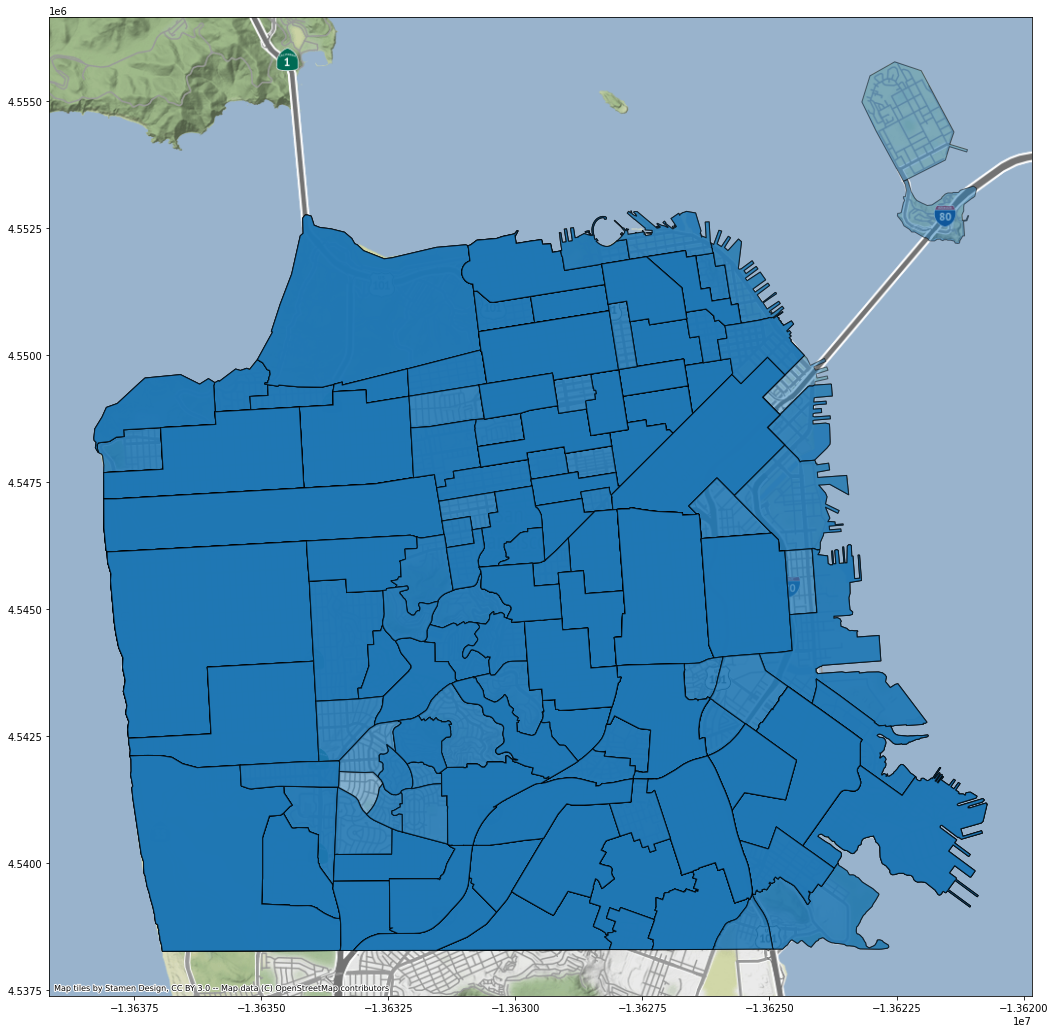

In [27]:
merged_sf = merged_sf.to_crs(epsg=3857)
ax = merged_sf.plot(figsize=(18, 18), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

create a variable (n_hshld_internet) for number of households with internet for each census tract by multiplying f_ba with households
n_hshld_internet = f_ba * households
add these together to find number of households with internet for each neighbourhood (neighb_hshld_internet)
add housholds to find number of households in each neighbourhood (neighb_hshld_total)
Then divide neighb_hshld_internet by neighb_hshld_total to find percent of househlods with internet in each neighbourhood


In [28]:
merged_sf.head()

link      name  \
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   

                                            geometry  index_right  \
0  POLYGON ((-13635909.066 4548889.167, -13635939...        51855   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        17436   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        10176   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        14067   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        39546   

         geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  ...  log_mhi  \
0  06075060100  3.559   3.239    0.569    0.521         0.048  ...    12.25   
0  06075042700  8.000   7.227    2.818    2.545         1.545  ...    11.44   
0  06075042601  8.067   7.333    3.267    2.800         1.800  ...    11.48   
0  06075980200  2.400   2.000    0.600    0.600         0.000  ...    11.95   
0  06075042800  5.914   5.343    1.714    1.629         0.829  ...    12.04   

   population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0      4226.0      1324.0  510.44   177.15  256.18   52.62   15.14   
0      5379.0      2334.0  502.19   113.83  201.86   87.96   12.60   
0      4004.0      1789.0  278.76    76.29  203.85  105.18   11.80   
0       312.0        70.0  234.45    54.35  234.62  100.95   15.33   
0      2507.0       891.0  334.10    87.68  204.97   82.93   12.37   

   tests_per_cap  devices_per_cap  
0          0.121            0.042  
0          0.093            0.021  
0          0.070            0.019  
0          0.751            0.174  
0          0.133            0.035  

[5 rows x 29 columns]

In [29]:
merged_sf['n_hshld_internet'] = merged_sf['f_broadband']*merged_sf['households']

In [30]:
merged_sf.head()

link      name  \
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   

                                            geometry  index_right  \
0  POLYGON ((-13635909.066 4548889.167, -13635939...        51855   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        17436   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        10176   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        14067   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        39546   

         geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  ...  \
0  06075060100  3.559   3.239    0.569    0.521         0.048  ...   
0  06075042700  8.000   7.227    2.818    2.545         1.545  ...   
0  06075042601  8.067   7.333    3.267    2.800         1.800  ...   
0  06075980200  2.400   2.000    0.600    0.600         0.000  ...   
0  06075042800  5.914   5.343    1.714    1.629         0.829  ...   

   population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0      4226.0      1324.0  510.44   177.15  256.18   52.62   15.14   
0      5379.0      2334.0  502.19   113.83  201.86   87.96   12.60   
0      4004.0      1789.0  278.76    76.29  203.85  105.18   11.80   
0       312.0        70.0  234.45    54.35  234.62  100.95   15.33   
0      2507.0       891.0  334.10    87.68  204.97   82.93   12.37   

   tests_per_cap  devices_per_cap  n_hshld_internet  
0          0.121            0.042          1278.984  
0          0.093            0.021          1909.212  
0          0.070            0.019          1606.522  
0          0.751            0.174            63.980  
0          0.133            0.035           866.052  

[5 rows x 30 columns]

In [31]:
merged_sf['neighb_hshld_internet'] = merged_sf['n_hshld_internet'].groupby(merged_sf['name']).transform('sum')

In [32]:
merged_sf

link             name  \
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
0    http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...         Seacliff   
..                                                 ...              ...   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   
116  http://en.wikipedia.org/wiki/Neighborhoods_in_...  Sherwood Forest   

                                              geometry  index_right  \
0    POLYGON ((-13635909.066 4548889.167, -13635939...        51855   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        17436   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        10176   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        14067   
0    POLYGON ((-13635909.066 4548889.167, -13635939...        39546   
..                                                 ...          ...   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        64202   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        61506   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        66729   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        42837   
116  POLYGON ((-13632062.910 4542836.706, -13632047...        14354   

           geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  ...  \
0    06075060100  3.559   3.239    0.569    0.521         0.048  ...   
0    06075042700  8.000   7.227    2.818    2.545         1.545  ...   
0    06075042601  8.067   7.333    3.267    2.800         1.800  ...   
0    06075980200  2.400   2.000    0.600    0.600         0.000  ...   
0    06075042800  5.914   5.343    1.714    1.629         0.829  ...   
..           ...    ...     ...      ...      ...           ...  ...   
116  06075030900  4.600   4.252    1.800    1.619         0.071  ...   
116  06075031000  4.971   4.691    2.324    2.074         0.221  ...   
116  06075030700  5.672   5.493    2.776    2.478         0.582  ...   
116  06075030800  5.695   5.415    2.817    2.268         0.439  ...   
116  06075030600  3.526   3.123    1.965    1.702         0.053  ...   

     households    tests  devices  d_mbps  u_mbps  lat_ms  tests_per_cap  \
0        1324.0   510.44   177.15  256.18   52.62   15.14          0.121   
0        2334.0   502.19   113.83  201.86   87.96   12.60          0.093   
0        1789.0   278.76    76.29  203.85  105.18   11.80          0.070   
0          70.0   234.45    54.35  234.62  100.95   15.33          0.751   
0         891.0   334.10    87.68  204.97   82.93   12.37          0.133   
..          ...      ...      ...     ...     ...     ...            ...   
116      2317.0  1123.11   244.82  195.49   35.03   15.52          0.158   
116      1444.0   626.34   139.44  217.23   45.22   15.80          0.165   
116      2623.0  1010.09   260.19  219.60   62.59   14.15          0.144   
116      2304.0   887.67   190.92  189.34   80.17   12.97          0.143   
116       899.0   401.18    69.11  191.60   43.88   15.43          0.161   

     devices_per_cap  n_hshld_internet  neighb_hshld_internet  
0              0.042          1278.984               5724.750  
0              0.021          1909.212               5724.750  
0              0.019          1606.522               5724.750  
0              0.174            63.980               5724.750  
0              0.035           866.052               5724.750  
..               ...               ...                    ...  
116            0.034          2231.271               9091.636  
116   

In [33]:
merged_sf['neighb_hshld_total'] = merged_sf['households'].groupby(merged_sf['name']).transform('sum')

In [34]:
merged_sf.head()

link      name  \
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   

                                            geometry  index_right  \
0  POLYGON ((-13635909.066 4548889.167, -13635939...        51855   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        17436   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        10176   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        14067   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        39546   

         geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  ...   tests  \
0  06075060100  3.559   3.239    0.569    0.521         0.048  ...  510.44   
0  06075042700  8.000   7.227    2.818    2.545         1.545  ...  502.19   
0  06075042601  8.067   7.333    3.267    2.800         1.800  ...  278.76   
0  06075980200  2.400   2.000    0.600    0.600         0.000  ...  234.45   
0  06075042800  5.914   5.343    1.714    1.629         0.829  ...  334.10   

   devices  d_mbps  u_mbps  lat_ms  tests_per_cap  devices_per_cap  \
0   177.15  256.18   52.62   15.14          0.121            0.042   
0   113.83  201.86   87.96   12.60          0.093            0.021   
0    76.29  203.85  105.18   11.80          0.070            0.019   
0    54.35  234.62  100.95   15.33          0.751            0.174   
0    87.68  204.97   82.93   12.37          0.133            0.035   

   n_hshld_internet  neighb_hshld_internet  neighb_hshld_total  
0          1278.984                5724.75              6408.0  
0          1909.212                5724.75              6408.0  
0          1606.522                5724.75              6408.0  
0            63.980                5724.75              6408.0  
0           866.052                5724.75              6408.0  

[5 rows x 32 columns]

In [35]:
merged_sf['internet_access_rate'] = merged_sf['neighb_hshld_internet']/merged_sf['neighb_hshld_total']

In [36]:
merged_sf.head()

link      name  \
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   
0  http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...  Seacliff   

                                            geometry  index_right  \
0  POLYGON ((-13635909.066 4548889.167, -13635939...        51855   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        17436   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        10176   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        14067   
0  POLYGON ((-13635909.066 4548889.167, -13635939...        39546   

         geoid  n_isp  n_dn10  n_dn100  n_dn250  n_fiber_100u  ...  devices  \
0  06075060100  3.559   3.239    0.569    0.521         0.048  ...   177.15   
0  06075042700  8.000   7.227    2.818    2.545         1.545  ...   113.83   
0  06075042601  8.067   7.333    3.267    2.800         1.800  ...    76.29   
0  06075980200  2.400   2.000    0.600    0.600         0.000  ...    54.35   
0  06075042800  5.914   5.343    1.714    1.629         0.829  ...    87.68   

   d_mbps  u_mbps  lat_ms  tests_per_cap  devices_per_cap  n_hshld_internet  \
0  256.18   52.62   15.14          0.121            0.042          1278.984   
0  201.86   87.96   12.60          0.093            0.021          1909.212   
0  203.85  105.18   11.80          0.070            0.019          1606.522   
0  234.62  100.95   15.33          0.751            0.174            63.980   
0  204.97   82.93   12.37          0.133            0.035           866.052   

   neighb_hshld_internet  neighb_hshld_total  internet_access_rate  
0                5724.75              6408.0              0.893375  
0                5724.75              6408.0              0.893375  
0                5724.75              6408.0              0.893375  
0                5724.75              6408.0              0.893375  
0                5724.75              6408.0              0.893375  

[5 rows x 33 columns]

In [37]:
sf_internet_equity = merged_sf[['name', 'geometry', 'internet_access_rate']]
sf_internet_equity


name                                           geometry  \
0           Seacliff  POLYGON ((-13635909.066 4548889.167, -13635939...   
0           Seacliff  POLYGON ((-13635909.066 4548889.167, -13635939...   
0           Seacliff  POLYGON ((-13635909.066 4548889.167, -13635939...   
0           Seacliff  POLYGON ((-13635909.066 4548889.167, -13635939...   
0           Seacliff  POLYGON ((-13635909.066 4548889.167, -13635939...   
..               ...                                                ...   
116  Sherwood Forest  POLYGON ((-13632062.910 4542836.706, -13632047...   
116  Sherwood Forest  POLYGON ((-13632062.910 4542836.706, -13632047...   
116  Sherwood Forest  POLYGON ((-13632062.910 4542836.706, -13632047...   
116  Sherwood Forest  POLYGON ((-13632062.910 4542836.706, -13632047...   
116  Sherwood Forest  POLYGON ((-13632062.910 4542836.706, -13632047...   

     internet_access_rate  
0                0.893375  
0                0.893375  
0                0.893375  
0                0.893375  
0                0.893375  
..                    ...  
116              0.948330  
116              0.948330  
116              0.948330  
116              0.948330  
116              0.948330  

[701 rows x 3 columns]

In [38]:
sf_internet_equity = sf_internet_equity.drop_duplicates()
sf_internet_equity

name  \
0                  Seacliff   
1               Lake Street   
2    Presidio National Park   
3          Presidio Terrace   
4            Inner Richmond   
..                      ...   
112          Corona Heights   
113         Ashbury Heights   
114           Eureka Valley   
115        St. Francis Wood   
116         Sherwood Forest   

                                              geometry  internet_access_rate  
0    POLYGON ((-13635909.066 4548889.167, -13635939...              0.893375  
1    POLYGON ((-13635207.246 4548926.811, -13635222...              0.882417  
2    POLYGON ((-13634141.858 4552759.779, -13634091...              0.900538  
3    POLYGON ((-13633566.376 4549428.413, -13633409...              0.895377  
4    POLYGON ((-13633590.339 4549283.086, -13632945...              0.905731  
..                                                 ...                   ...  
112  POLYGON ((-13629422.779 4545953.181, -13629437...              0.924068  
113  POLYGON ((-13631289.585 4545785.263, -13631305...              0.938954  
114  POLYGON ((-13629662.606 4545908.690, -13629628...              0.933424  
115  POLYGON ((-13633472.736 4542016.274, -13633109...              0.961006  
116  POLYGON ((-13632062.910 4542836.706, -13632047...              0.948330  

[117 rows x 3 columns]

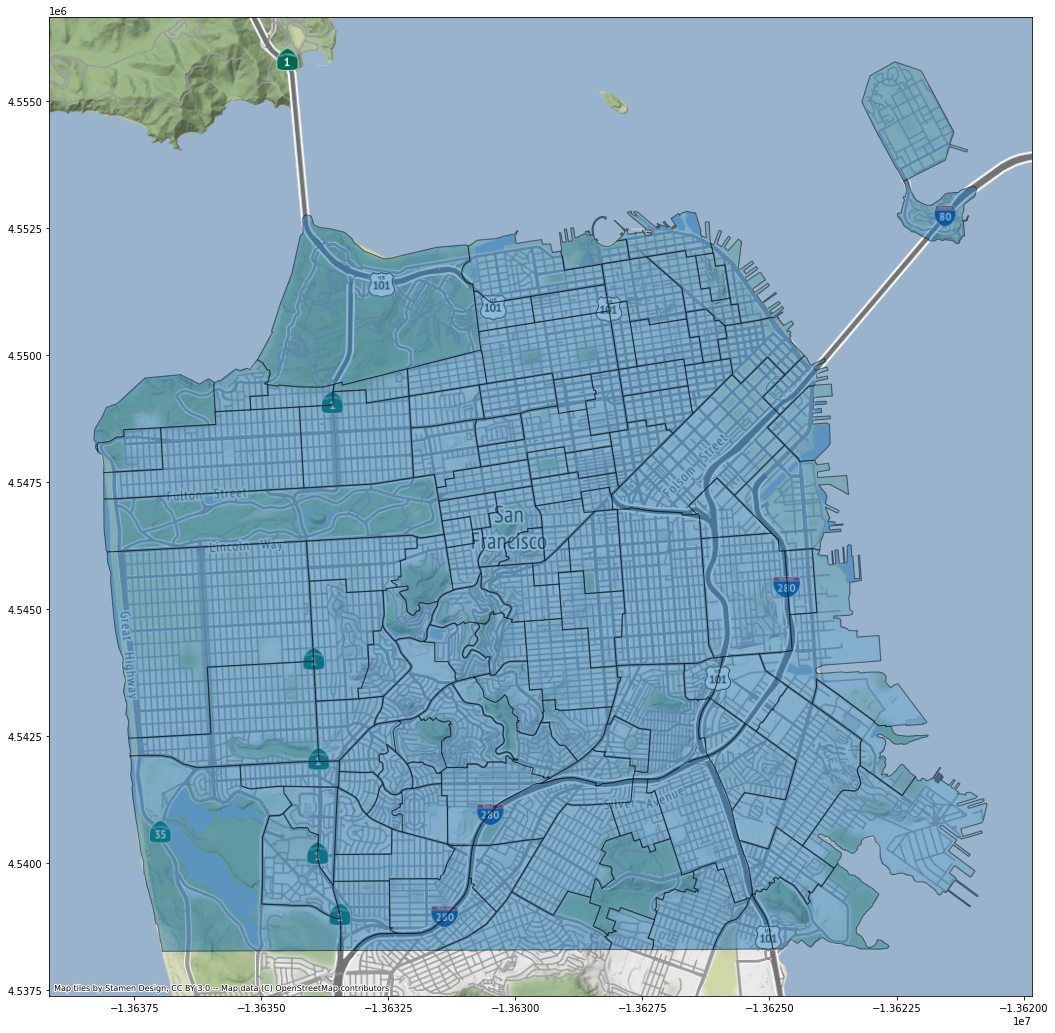

In [39]:
ax = sf.plot(figsize=(18, 18), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

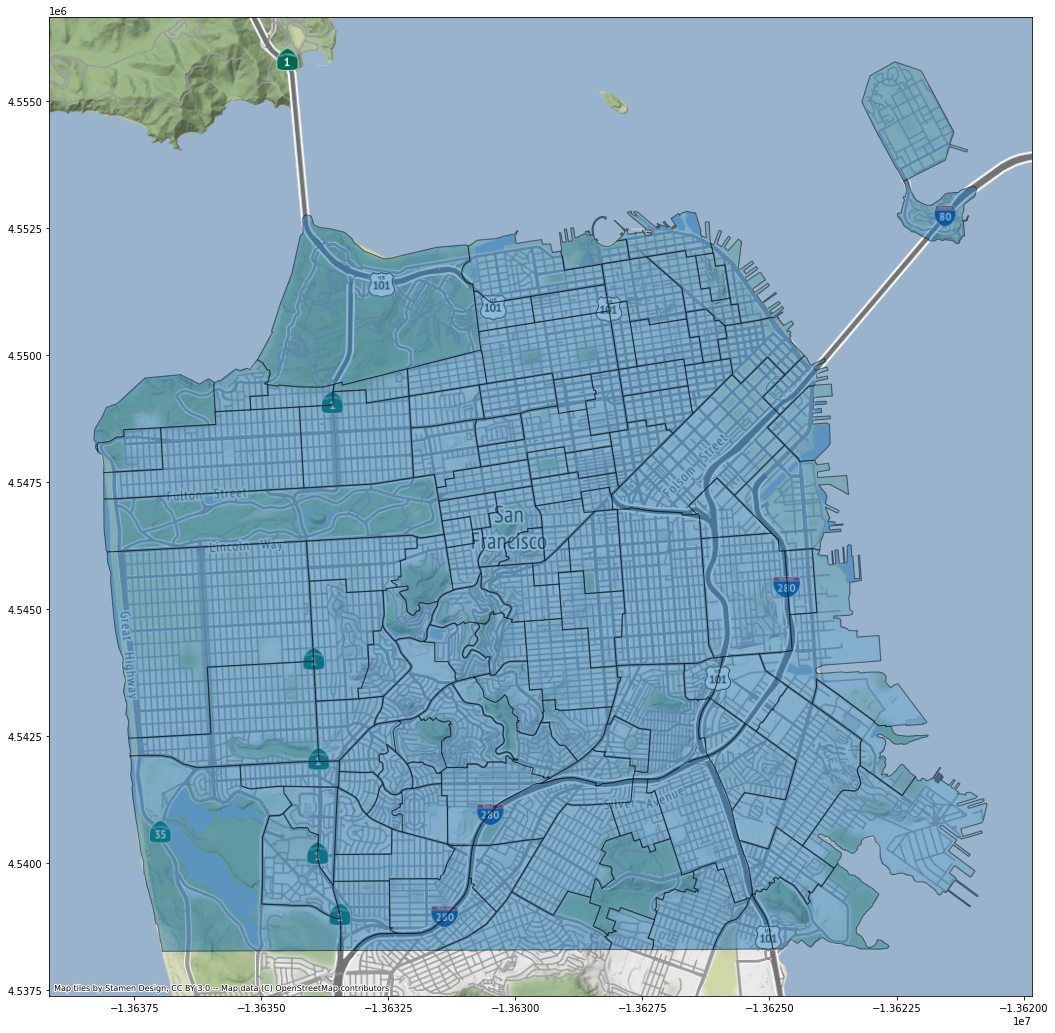

In [40]:
sf_internet_equity = sf_internet_equity.to_crs(epsg=3857)
ax = sf_internet_equity.plot(figsize=(18, 18), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

San Fransisco

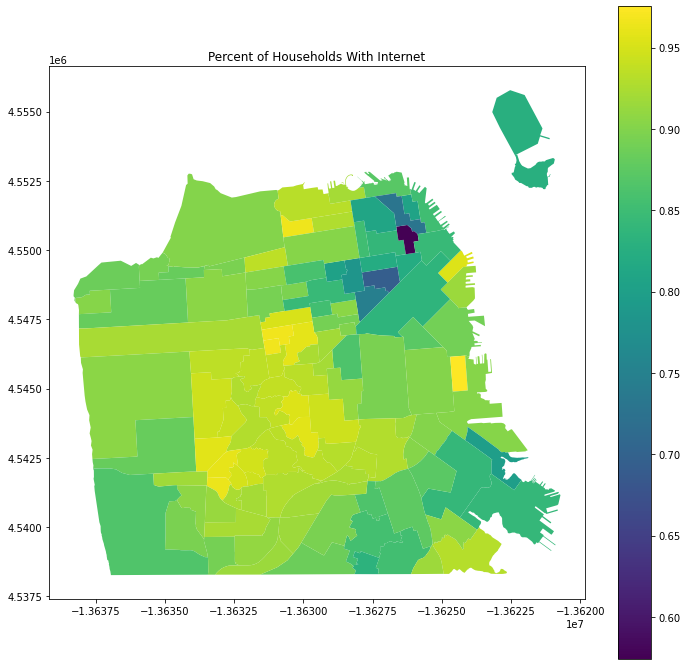

In [41]:
so.simple_map(sf_internet_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet')

In [42]:
merged_colmb

OBJECTID      AREA_NAME  CREATED_DA  LAST_EDIT_  AREA_NO  \
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
0        359      Far South  2018-10-02  2021-08-18       64   
..       ...            ...         ...         ...      ...   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   
40       399  State of Ohio  2018-10-02  2018-10-03       66   

                                  GLOBALID    SHAPESTAre     SHAPESTLen  \
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
0   {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.363910   
..                                     ...           ...            ...   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   
40  {60C8CBE3-741E-420F-AC7F-27A720B9D053}  1.875529e+07   19528.007947   

                                             geometry  index_right  ...  \
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        58553  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        56724  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        56623  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...         4814  ...   
0   POLYGON ((-9231490.644 4854175.954, -9231381.2...        35871  ...   
..                                                ...          ...  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        67702  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        58266  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...         5187  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        50244  ...   
40  POLYGON ((-9237849.889 4865217.795, -9237873.7...        11455  ...   

   log_mhi  population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0    11.13      4788.0      1707.0  307.12    81.44  250.67  110.16   30.53   
0    10.95      6824.0      2308.0  281.33    87.04  228.02   21.20   18.26   
0    10.57      4588.0      1681.0  142.55    57.09  232.39   24.19   14.73   
0    10.63      2436.0       952.0   26.68    16.85  222.34   21.65   20.10   
0    11.13      5848.0      1638.0  261.47    94.74  225.39   20.90   14.81   
..     ...         ...         ...     ...      ...     ...     ...     ...   
40   10.34      4202.0      1119.0  119.75    52.01  158.55   26.56   14.58   
40   10.15      2559.0       977.0  199.02    27.38  212.43   28.55   12.09   
40   10.84      6092.0      2021.0  152.43    85.02  231.39   44.22   14.84   
40   10.86      3643.0      1708.0  207.79    53.38  214.56   59.32   15.20   
40   10.41      3427.0      1340.0  127.81    36.54  155.98   23.52   12.74   

    tests_per_cap  devices_per_cap  
0           0.064            0.017  
0           0.041            0.013  
0           0.031            0.012  
0           0.011            0.007  
0           0.045            0.016  
..            ...              ...  
40          0.028            0.012  
40          0.078            0.011  
40          0.025            0.014  
40          0.057            0.015  
40          0.037            0.011  

[506 rows x 35 columns]

In [43]:
merged_colmb = merged_colmb.rename(columns={'AREA_NAME':'name'})
merged_colmb.head()

OBJECTID       name  CREATED_DA  LAST_EDIT_  AREA_NO  \
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   

                                 GLOBALID    SHAPESTAre    SHAPESTLen  \
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   

                                            geometry  index_right  ...  \
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        58553  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        56724  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        56623  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...         4814  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        35871  ...   

  log_mhi  population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0   11.13      4788.0      1707.0  307.12    81.44  250.67  110.16   30.53   
0   10.95      6824.0      2308.0  281.33    87.04  228.02   21.20   18.26   
0   10.57      4588.0      1681.0  142.55    57.09  232.39   24.19   14.73   
0   10.63      2436.0       952.0   26.68    16.85  222.34   21.65   20.10   
0   11.13      5848.0      1638.0  261.47    94.74  225.39   20.90   14.81   

   tests_per_cap  devices_per_cap  
0          0.064            0.017  
0          0.041            0.013  
0          0.031            0.012  
0          0.011            0.007  
0          0.045            0.016  

[5 rows x 35 columns]

In [44]:
merged_colmb['n_hshld_internet'] = merged_colmb['f_broadband']*merged_colmb['households']

In [45]:
merged_colmb['neighb_hshld_internet'] = merged_colmb['n_hshld_internet'].groupby(merged_colmb['name']).transform('sum')

In [46]:
merged_colmb['neighb_hshld_total'] = merged_colmb['households'].groupby(merged_colmb['name']).transform('sum')

In [47]:
merged_colmb['internet_access_rate'] = merged_colmb['neighb_hshld_internet']/merged_colmb['neighb_hshld_total']

In [48]:
merged_colmb.head()

OBJECTID       name  CREATED_DA  LAST_EDIT_  AREA_NO  \
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   
0       359  Far South  2018-10-02  2021-08-18       64   

                                 GLOBALID    SHAPESTAre    SHAPESTLen  \
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   
0  {DE1E5BD1-465B-4DA0-A5DB-4D518C3AC9DF}  7.100485e+08  390843.36391   

                                            geometry  index_right  ...  \
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        58553  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        56724  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        56623  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...         4814  ...   
0  POLYGON ((-9231490.644 4854175.954, -9231381.2...        35871  ...   

  devices  d_mbps  u_mbps  lat_ms  tests_per_cap  devices_per_cap  \
0   81.44  250.67  110.16   30.53          0.064            0.017   
0   87.04  228.02   21.20   18.26          0.041            0.013   
0   57.09  232.39   24.19   14.73          0.031            0.012   
0   16.85  222.34   21.65   20.10          0.011            0.007   
0   94.74  225.39   20.90   14.81          0.045            0.016   

   n_hshld_internet  neighb_hshld_internet  neighb_hshld_total  \
0          1478.262              24341.299             28879.0   
0          1899.484              24341.299             28879.0   
0          1321.266              24341.299             28879.0   
0           679.728              24341.299             28879.0   
0          1375.920              24341.299             28879.0   

   internet_access_rate  
0              0.842872  
0              0.842872  
0              0.842872  
0              0.842872  
0              0.842872  

[5 rows x 39 columns]

In [49]:
col_internet_equity = merged_colmb[['name', 'geometry', 'internet_access_rate']]
col_internet_equity

name                                           geometry  \
0       Far South  POLYGON ((-9231490.644 4854175.954, -9231381.2...   
0       Far South  POLYGON ((-9231490.644 4854175.954, -9231381.2...   
0       Far South  POLYGON ((-9231490.644 4854175.954, -9231381.2...   
0       Far South  POLYGON ((-9231490.644 4854175.954, -9231381.2...   
0       Far South  POLYGON ((-9231490.644 4854175.954, -9231381.2...   
..            ...                                                ...   
40  State of Ohio  POLYGON ((-9237849.889 4865217.795, -9237873.7...   
40  State of Ohio  POLYGON ((-9237849.889 4865217.795, -9237873.7...   
40  State of Ohio  POLYGON ((-9237849.889 4865217.795, -9237873.7...   
40  State of Ohio  POLYGON ((-9237849.889 4865217.795, -9237873.7...   
40  State of Ohio  POLYGON ((-9237849.889 4865217.795, -9237873.7...   

    internet_access_rate  
0               0.842872  
0               0.842872  
0               0.842872  
0               0.842872  
0               0.842872  
..                   ...  
40              0.835692  
40              0.835692  
40              0.835692  
40              0.835692  
40              0.835692  

[506 rows x 3 columns]

In [50]:
col_internet_equity = col_internet_equity.drop_duplicates()
col_internet_equity.head()

name                                           geometry  \
0               Far South  POLYGON ((-9231490.644 4854175.954, -9231381.2...   
1  Livingston Avenue Area  POLYGON ((-9237464.484 4859337.582, -9237422.6...   
2               Southwest  POLYGON ((-9242025.513 4858463.254, -9241914.2...   
3     University District  POLYGON ((-9239995.319 4868718.067, -9239987.6...   
4                Westland  POLYGON ((-9253162.962 4855317.819, -9253159.4...   

   internet_access_rate  
0              0.842872  
1              0.733799  
2              0.790513  
3              0.873292  
4              0.877733

Columbus

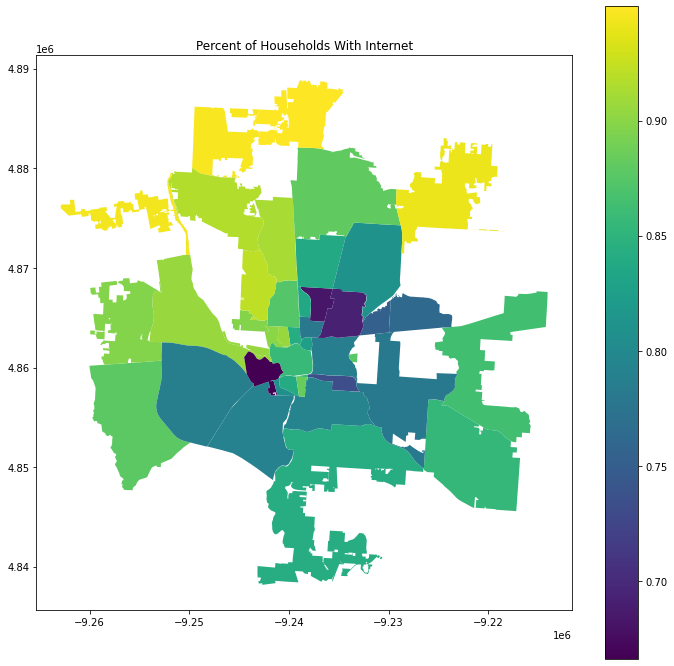

In [51]:
so.simple_map(col_internet_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet')

In [52]:
merged_indy.head()

OBJECTID     NAME                                GLOBALID     SHAPEAREA  \
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   

       SHAPELEN                                           geometry  \
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   

   index_right        geoid  n_isp  n_dn10  ...  log_mhi  population  \
0        49420  18063210607  3.268   3.128  ...    10.88      5694.0   
0        64450  18097370201  3.525   3.386  ...    10.74      4565.0   
0        56519  18097390800  2.827   2.429  ...    11.00      3893.0   
0        30274  18097342000  3.439   3.356  ...    11.07      6726.0   
0         9647  18097342200  3.735   3.451  ...    10.51      5722.0   

   households   tests  devices  d_mbps  u_mbps  lat_ms  tests_per_cap  \
0      2145.0  303.74   120.43  190.02   75.52   20.97          0.053   
0      1645.0  154.67    49.34  301.49   52.51   21.94          0.034   
0      1297.0  166.19    70.05  258.55   76.91   28.82          0.043   
0      2053.0  271.77    92.55  263.74   76.60   20.55          0.040   
0      1846.0  162.33    64.50  242.98   81.27   20.60          0.028   

   devices_per_cap  
0            0.021  
0            0.011  
0            0.018  
0            0.014  
0            0.011  

[5 rows x 32 columns]

In [53]:
merged_indy = merged_indy.rename(columns={'NAME':'name'})
merged_indy.head()

OBJECTID     name                                GLOBALID     SHAPEAREA  \
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   

       SHAPELEN                                           geometry  \
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   

   index_right        geoid  n_isp  n_dn10  ...  log_mhi  population  \
0        49420  18063210607  3.268   3.128  ...    10.88      5694.0   
0        64450  18097370201  3.525   3.386  ...    10.74      4565.0   
0        56519  18097390800  2.827   2.429  ...    11.00      3893.0   
0        30274  18097342000  3.439   3.356  ...    11.07      6726.0   
0         9647  18097342200  3.735   3.451  ...    10.51      5722.0   

   households   tests  devices  d_mbps  u_mbps  lat_ms  tests_per_cap  \
0      2145.0  303.74   120.43  190.02   75.52   20.97          0.053   
0      1645.0  154.67    49.34  301.49   52.51   21.94          0.034   
0      1297.0  166.19    70.05  258.55   76.91   28.82          0.043   
0      2053.0  271.77    92.55  263.74   76.60   20.55          0.040   
0      1846.0  162.33    64.50  242.98   81.27   20.60          0.028   

   devices_per_cap  
0            0.021  
0            0.011  
0            0.018  
0            0.014  
0            0.011  

[5 rows x 32 columns]

In [54]:
merged_indy['n_hshld_internet'] = merged_indy['f_broadband']*merged_indy['households']
merged_indy['neighb_hshld_internet'] = merged_indy['n_hshld_internet'].groupby(merged_indy['name']).transform('sum')
merged_indy['neighb_hshld_total'] = merged_indy['households'].groupby(merged_indy['name']).transform('sum')
merged_indy['internet_access_rate'] = merged_indy['neighb_hshld_internet']/merged_indy['neighb_hshld_total']
merged_indy.head()

OBJECTID     name                                GLOBALID     SHAPEAREA  \
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   
0         1  Airport  {BAA9E46C-D595-4B87-B4B4-D7ED99DC95D4}  2.418690e+08   

       SHAPELEN                                           geometry  \
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0  67933.203292  POLYGON ((-9602944.613 4829335.979, -9602943.7...   

   index_right        geoid  n_isp  n_dn10  ...  devices  d_mbps  u_mbps  \
0        49420  18063210607  3.268   3.128  ...   120.43  190.02   75.52   
0        64450  18097370201  3.525   3.386  ...    49.34  301.49   52.51   
0        56519  18097390800  2.827   2.429  ...    70.05  258.55   76.91   
0        30274  18097342000  3.439   3.356  ...    92.55  263.74   76.60   
0         9647  18097342200  3.735   3.451  ...    64.50  242.98   81.27   

   lat_ms  tests_per_cap  devices_per_cap  n_hshld_internet  \
0   20.97          0.053            0.021          1868.295   
0   21.94          0.034            0.011          1281.455   
0   28.82          0.043            0.018          1079.104   
0   20.55          0.040            0.014          1679.354   
0   20.60          0.028            0.011          1255.280   

   neighb_hshld_internet  neighb_hshld_total  internet_access_rate  
0              10015.172             12132.0              0.825517  
0              10015.172             12132.0              0.825517  
0              10015.172             12132.0              0.825517  
0              10015.172             12132.0              0.825517  
0              10015.172             12132.0              0.825517  

[5 rows x 36 columns]

In [55]:
indy_internet_equity = merged_indy[['name', 'geometry', 'internet_access_rate']]
indy_internet_equity

name                                           geometry  \
0          Airport  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0          Airport  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0          Airport  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0          Airport  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
0          Airport  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
..             ...                                                ...   
97  Christian Park  POLYGON ((-9582713.545 4831174.608, -9582713.5...   
98    College Park  POLYGON ((-9596130.045 4855293.322, -9596116.1...   
98    College Park  POLYGON ((-9596130.045 4855293.322, -9596116.1...   
98    College Park  POLYGON ((-9596130.045 4855293.322, -9596116.1...   
98    College Park  POLYGON ((-9596130.045 4855293.322, -9596116.1...   

    internet_access_rate  
0               0.825517  
0               0.825517  
0               0.825517  
0               0.825517  
0               0.825517  
..                   ...  
97              0.566546  
98              0.876231  
98              0.876231  
98              0.876231  
98              0.876231  

[742 rows x 3 columns]

In [56]:
indy_internet_equity = indy_internet_equity.drop_duplicates()
indy_internet_equity.head()

name                                           geometry  \
0                Airport  POLYGON ((-9602944.613 4829335.979, -9602943.7...   
1           Allisonville  POLYGON ((-9582940.862 4852151.547, -9582908.4...   
2              Ameriplex  POLYGON ((-9603441.542 4821693.570, -9603468.2...   
3        Arlington Woods  POLYGON ((-9577032.371 4840641.248, -9577024.6...   
4  Augusta / New Augusta  POLYGON ((-9596078.222 4853157.578, -9596078.3...   

   internet_access_rate  
0              0.825517  
1              0.852703  
2              0.864660  
3              0.591462  
4              0.833179

Indianapolis

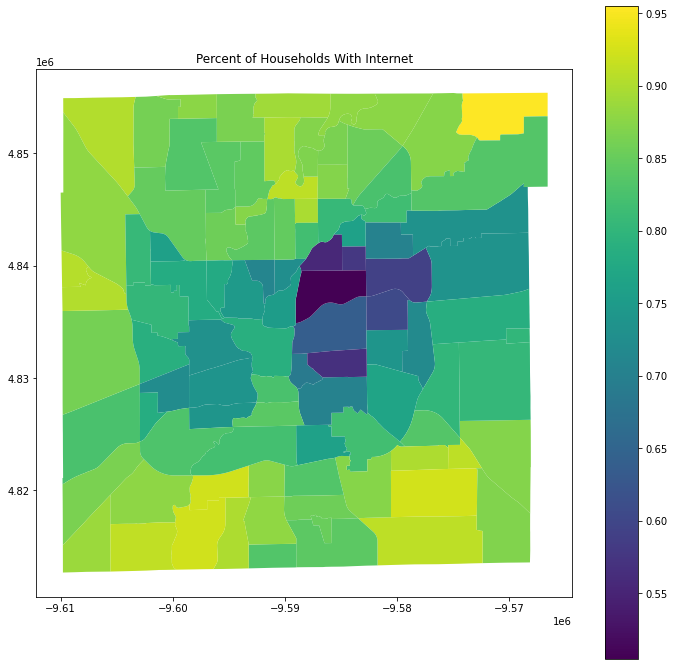

In [57]:
so.simple_map(indy_internet_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet')

In [58]:
merged_charlotte.head()

OBJECTID DistrictTy DistrictNa      Name created_us created_da last_edite  \
0         8      Local   4th Ward  4th Ward       None       None       None   
0         8      Local   4th Ward  4th Ward       None       None       None   
1         9      Local    Wilmore   Wilmore       None       None       None   
1         9      Local    Wilmore   Wilmore       None       None       None   
2        10      Local   Dilworth  Dilworth       None       None       None   

  last_edi_1                              GlobalID    Shape__Are  ...  \
0       None  363f7f44-a5fc-43aa-9301-e7f4221089aa  4.645947e+06  ...   
0       None  363f7f44-a5fc-43aa-9301-e7f4221089aa  4.645947e+06  ...   
1       None  2f7db0a6-9ffc-4c58-a114-94f04282c67e  7.172640e+06  ...   
1       None  2f7db0a6-9ffc-4c58-a114-94f04282c67e  7.172640e+06  ...   
2       None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4  1.910140e+07  ...   

   log_mhi population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0    11.64     5897.0      3480.0  767.90   315.33  259.34  168.29   13.20   
0    11.24     5438.0      2789.0  624.27   176.20  295.36  128.02   19.35   
1    10.90     4053.0      1722.0  313.35    77.89  231.70  101.95   18.99   
1    11.28     3490.0      2230.0  173.23    80.79  219.01   93.41   20.56   
2    11.84     5667.0      2486.0  595.71   213.27  240.23  129.91   15.59   

   tests_per_cap  devices_per_cap  
0          0.130            0.053  
0          0.115            0.032  
1          0.077            0.019  
1          0.050            0.023  
2          0.105            0.038  

[5 rows x 38 columns]

In [59]:
merged_charlotte = merged_charlotte.rename(columns={'Name':'name'})
merged_charlotte.head()

OBJECTID DistrictTy DistrictNa      name created_us created_da last_edite  \
0         8      Local   4th Ward  4th Ward       None       None       None   
0         8      Local   4th Ward  4th Ward       None       None       None   
1         9      Local    Wilmore   Wilmore       None       None       None   
1         9      Local    Wilmore   Wilmore       None       None       None   
2        10      Local   Dilworth  Dilworth       None       None       None   

  last_edi_1                              GlobalID    Shape__Are  ...  \
0       None  363f7f44-a5fc-43aa-9301-e7f4221089aa  4.645947e+06  ...   
0       None  363f7f44-a5fc-43aa-9301-e7f4221089aa  4.645947e+06  ...   
1       None  2f7db0a6-9ffc-4c58-a114-94f04282c67e  7.172640e+06  ...   
1       None  2f7db0a6-9ffc-4c58-a114-94f04282c67e  7.172640e+06  ...   
2       None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4  1.910140e+07  ...   

   log_mhi population  households   tests  devices  d_mbps  u_mbps  lat_ms  \
0    11.64     5897.0      3480.0  767.90   315.33  259.34  168.29   13.20   
0    11.24     5438.0      2789.0  624.27   176.20  295.36  128.02   19.35   
1    10.90     4053.0      1722.0  313.35    77.89  231.70  101.95   18.99   
1    11.28     3490.0      2230.0  173.23    80.79  219.01   93.41   20.56   
2    11.84     5667.0      2486.0  595.71   213.27  240.23  129.91   15.59   

   tests_per_cap  devices_per_cap  
0          0.130            0.053  
0          0.115            0.032  
1          0.077            0.019  
1          0.050            0.023  
2          0.105            0.038  

[5 rows x 38 columns]

In [60]:
merged_charlotte['n_hshld_internet'] = merged_charlotte['f_broadband']*merged_charlotte['households']
merged_charlotte['neighb_hshld_internet'] = merged_charlotte['n_hshld_internet'].groupby(merged_charlotte['name']).transform('sum')
merged_charlotte['neighb_hshld_total'] = merged_charlotte['households'].groupby(merged_charlotte['name']).transform('sum')
merged_charlotte['internet_access_rate'] = merged_charlotte['neighb_hshld_internet']/merged_charlotte['neighb_hshld_total']
merged_charlotte.head()

OBJECTID DistrictTy DistrictNa      name created_us created_da last_edite  \
0         8      Local   4th Ward  4th Ward       None       None       None   
0         8      Local   4th Ward  4th Ward       None       None       None   
1         9      Local    Wilmore   Wilmore       None       None       None   
1         9      Local    Wilmore   Wilmore       None       None       None   
2        10      Local   Dilworth  Dilworth       None       None       None   

  last_edi_1                              GlobalID    Shape__Are  ...  \
0       None  363f7f44-a5fc-43aa-9301-e7f4221089aa  4.645947e+06  ...   
0       None  363f7f44-a5fc-43aa-9301-e7f4221089aa  4.645947e+06  ...   
1       None  2f7db0a6-9ffc-4c58-a114-94f04282c67e  7.172640e+06  ...   
1       None  2f7db0a6-9ffc-4c58-a114-94f04282c67e  7.172640e+06  ...   
2       None  ebbb0951-ec34-42f2-8f25-1bdf56134bb4  1.910140e+07  ...   

   devices  d_mbps  u_mbps lat_ms  tests_per_cap  devices_per_cap  \
0   315.33  259.34  168.29  13.20          0.130            0.053   
0   176.20  295.36  128.02  19.35          0.115            0.032   
1    77.89  231.70  101.95  18.99          0.077            0.019   
1    80.79  219.01   93.41  20.56          0.050            0.023   
2   213.27  240.23  129.91  15.59          0.105            0.038   

   n_hshld_internet  neighb_hshld_internet  neighb_hshld_total  \
0          3225.960               5577.087              6269.0   
0          2351.127               5577.087              6269.0   
1          1351.770               3416.750              3952.0   
1          2064.980               3416.750              3952.0   
2          2391.532               5722.938              6027.0   

   internet_access_rate  
0              0.889629  
0              0.889629  
1              0.864562  
1              0.864562  
2              0.949550  

[5 rows x 42 columns]

In [61]:
charlotte_internet_equity = merged_charlotte[['name', 'geometry', 'internet_access_rate']]
charlotte_internet_equity

name                                           geometry  \
0          4th Ward  POLYGON ((-8999443.705 4196011.326, -8999437.3...   
0          4th Ward  POLYGON ((-8999443.705 4196011.326, -8999437.3...   
1           Wilmore  POLYGON ((-9001402.113 4193776.711, -9001364.8...   
1           Wilmore  POLYGON ((-9001402.113 4193776.711, -9001364.8...   
2          Dilworth  POLYGON ((-9001144.698 4192315.173, -9001037.5...   
2          Dilworth  POLYGON ((-9001144.698 4192315.173, -9001037.5...   
2          Dilworth  POLYGON ((-9001144.698 4192315.173, -9001037.5...   
3      Oaklawn Park  POLYGON ((-8999457.411 4198624.696, -8999471.9...   
4   Hermitage Court  POLYGON ((-8997826.061 4191782.567, -8997831.5...   
4   Hermitage Court  POLYGON ((-8997826.061 4191782.567, -8997831.5...   
5     Plaza-Midwood  POLYGON ((-8995504.683 4195005.558, -8995510.5...   
6    Wesley Heights  POLYGON ((-9001819.988 4195996.401, -9001803.4...   
7  McCrorey Heights  POLYGON ((-9000707.778 4197649.265, -9000698.8...   

   internet_access_rate  
0              0.889629  
0              0.889629  
1              0.864562  
1              0.864562  
2              0.949550  
2              0.949550  
2              0.949550  
3              0.537000  
4              0.953023  
4              0.953023  
5              0.957000  
6              0.853000  
7              0.537000

In [62]:
charlotte_internet_equity = charlotte_internet_equity.drop_duplicates()
charlotte_internet_equity.head()

name                                           geometry  \
0         4th Ward  POLYGON ((-8999443.705 4196011.326, -8999437.3...   
1          Wilmore  POLYGON ((-9001402.113 4193776.711, -9001364.8...   
2         Dilworth  POLYGON ((-9001144.698 4192315.173, -9001037.5...   
3     Oaklawn Park  POLYGON ((-8999457.411 4198624.696, -8999471.9...   
4  Hermitage Court  POLYGON ((-8997826.061 4191782.567, -8997831.5...   

   internet_access_rate  
0              0.889629  
1              0.864562  
2              0.949550  
3              0.537000  
4              0.953023

Charlotte

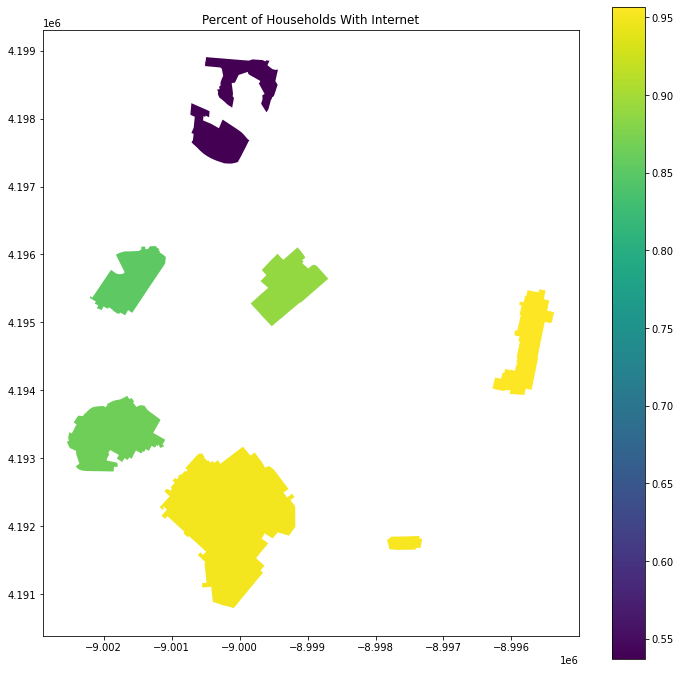

In [63]:
so.simple_map(charlotte_internet_equity, 'internet_access_rate', 'name', 'Percent of Households With Internet')

Functional Form of the Code

In [64]:
def df_clean(df):
    df['n_hshld_internet'] = df['f_broadband']*df['households']

    df['neighb_hshld_internet'] = df['n_hshld_internet'].groupby(df['name']).transform('sum')

    df['neighb_hshld_total'] = df['households'].groupby(df['name']).transform('sum')

    df['internet_access_rate'] = df['neighb_hshld_internet']/df['neighb_hshld_total']

    df_internet_equity = df[['name', 'geometry', 'internet_access_rate']]

    df_internet_equity = df_internet_equity.drop_duplicates()
    
    return df_internet_equity

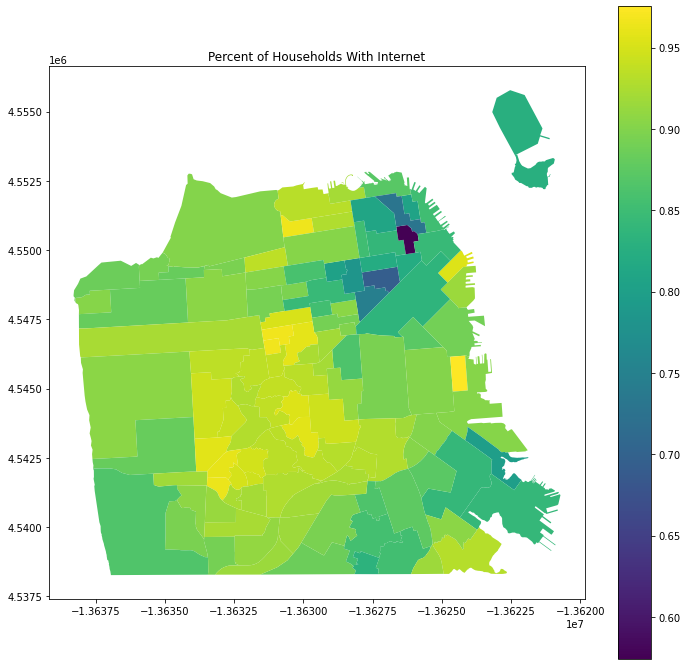

In [65]:
so.simple_map(df_clean(merged_sf), 'internet_access_rate', 'name', 'Percent of Households With Internet')

In [66]:
merged_sf[['f_ba', 'f_broadband']]

f_ba  f_broadband
0    0.842        0.966
0    0.579        0.818
0    0.655        0.898
0    0.617        0.914
0    0.846        0.972
..     ...          ...
116  0.643        0.963
116  0.655        0.930
116  0.657        0.941
116  0.727        0.959
116  0.700        0.934

[701 rows x 2 columns]